# Problem Set #5
### 2013-10963 Seha Lee

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

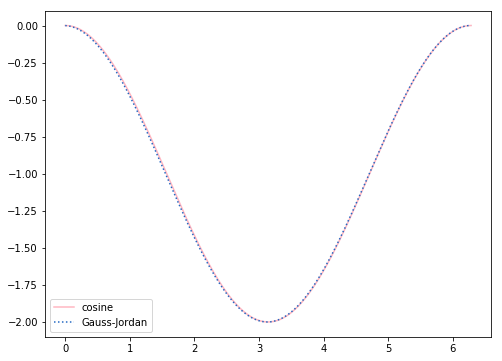

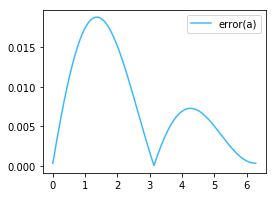

In [294]:
#1(a)

n=256
A=np.zeros((n,n))
B=np.array([])

for i in range(0,n):
    A[i,i]=-2
for i in range (0,n-1):
    A[i,i+1]=1
    A[i+1,i]=1
    
for i in range (1,n+1):
    b=-np.cos(2*np.pi*i/n)*(2*np.pi/n)**2
    B=np.append(B,b)

N=len(A)
x1=np.zeros(N)

for j in range(N):
    for i in range(j+1,N):
        coef = A[i][j]/A[j][j]
        for k in range(N):
            A[i][k]-=coef*A[j][k]
        B[i]-=coef*B[j]

x1[N-1]=B[N-1]/A[N-1][N-1]

for k in range(N-1,-1,-1):
    sum = np.dot(A[k][k+1:],x[k+1:])
    x1[k]=(B[k]-sum)/A[k][k]
    
t=np.linspace(0,2*np.pi,num=n)
u=np.cos(t)-1
err1= np.abs(u-x1)

fig=plt.figure(1,figsize=(8,6))
plt.plot(t,u,label='cosine',c='lightpink')
plt.plot(t,x1,':',label='Gauss-Jordan',c='#2368C2')
plt.legend()

fig=plt.figure(2,figsize=(4,3))
plt.plot(t,err1,label='error(a)',c='#3BB9FF')
plt.legend()

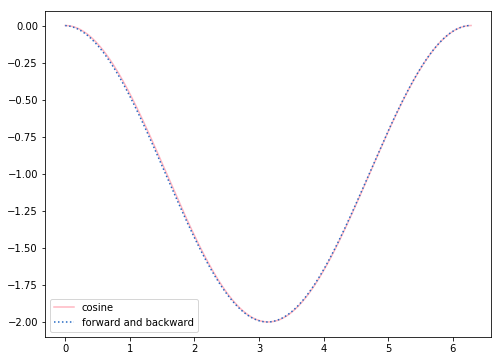

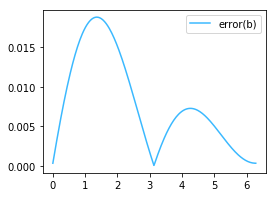

In [283]:
#1 (b)
def tridiagonal(n,r,a,b,c):
    rho=np.zeros(n)
    gam=np.zeros(n-1)
    # forward substitution
    bet=b[0]
    rho[0]=r[0]/bet
    for i in range(1,n):
        gam[i-1] = c[i-1]/bet
        bet = b[i]-a[i]*gam[i-1]
        rho[i] = (r[i]-a[i]*rho[i-1])/bet
    # backward substitution
    x=np.zeros(n)
    x[n-1]=rho[n-1]
    for i in range(n-2,-1,-1):
        x[i]=rho[i]-gam[i]*x[i+1]
    return x

n=256
a=np.zeros(n)
b=np.array([])
c=np.zeros(n)
r=np.array([])

for i in range (0,n-1):
    a[i+1]=1
    c[i]=1
    
for i in range (1,n+1):
    R=-np.cos(2*np.pi*i/n)*(2*np.pi/n)**2
    r=np.append(r,R)

for i in range(0,n):
    b=np.append(b,-2)

x2=tridiagonal(n,r,a,b,c)

t=np.linspace(0,2*np.pi,num=n)
u=np.cos(t)-1
err2= np.abs(u-x2)


fig=plt.figure(1,figsize=(8,6))
plt.plot(t,u,label='cosine',c='lightpink')
plt.plot(t,x2,':',label='forward and backward',c='#2368C2')
plt.legend()

fig=plt.figure(2,figsize=(4,3))
plt.plot(t,err2,label='error(b)',c='#3BB9FF')
plt.legend()

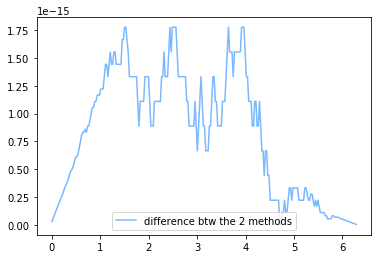

In [298]:
fig=plt.figure(1,figsize=(6,4))
plt.plot(t,np.abs(x1-x2),label='difference btw the 2 methods',c='#7ab8ff')
plt.legend(loc=8)

In [286]:
#2 (a) setting the constants

B=np.zeros(6)
B[5]=1

w=[1,3,5,5,1,1] 

O=np.zeros((6,6)) #omega
O[0,1:6]=[0.408, 0.272, 0.2934, 0.0326, 0.1323]
O[1,2:6]=[1.120, 0.8803, 0.0977, 0.3968]
O[2,3:6]=[1.4672, 0.1628, 0.6613]
O[3,4]=0.8338

b=np.zeros((6,6)) #beta
b[0,1:6]=[0.125, 0.21, 0.048, 0.050, 0.025]
b[1,2:6]=[0.17, 0.048, 0.050, 0.025]
b[2,3:6]=[0.048, 0.050, 0.025]
b[3,4]=-0.18

E=np.zeros((6,6))
E[0,1:6]=[0.00609, 0.01628, 1.89879, 4.05244, 5.80061]
E[1,2:6]=[0.01019, 1.89270, 4.04635, 5.79452]
E[2,3:6]=[1.88251, 4.03616, 5.78433]
E[3,4:6]=[2.15365, 3.90182]
E[4,5]=1.74817

O=np.transpose(O)
b=np.transpose(b)

print(B,'\n',O,'\n',b,'\n',E)

[0. 0. 0. 0. 0. 1.] 
 [[0.     0.     0.     0.     0.     0.    ]
 [0.408  0.     0.     0.     0.     0.    ]
 [0.272  1.12   0.     0.     0.     0.    ]
 [0.2934 0.8803 1.4672 0.     0.     0.    ]
 [0.0326 0.0977 0.1628 0.8338 0.     0.    ]
 [0.1323 0.3968 0.6613 0.     0.     0.    ]] 
 [[ 0.     0.     0.     0.     0.     0.   ]
 [ 0.125  0.     0.     0.     0.     0.   ]
 [ 0.21   0.17   0.     0.     0.     0.   ]
 [ 0.048  0.048  0.048  0.     0.     0.   ]
 [ 0.05   0.05   0.05  -0.18   0.     0.   ]
 [ 0.025  0.025  0.025  0.     0.     0.   ]] 
 [[0.      0.00609 0.01628 1.89879 4.05244 5.80061]
 [0.      0.      0.01019 1.8927  4.04635 5.79452]
 [0.      0.      0.      1.88251 4.03616 5.78433]
 [0.      0.      0.      0.      2.15365 3.90182]
 [0.      0.      0.      0.      0.      1.74817]
 [0.      0.      0.      0.      0.      0.     ]]


In [287]:
#2(a)
def N(t,ne):
    
    def Q(t):
    
        q1=np.zeros((6,6))
        q2=np.zeros((6,6))
        for i in range(0,6):
            for j in range(0,6):
                if j>i:
                    c=8.629*pow(10,-8)
                    o1=c*pow(t,b[j][i])*O[j][i]
                    o2=np.sqrt(t)*w[j]
                    q1[j][i]=o1/o2
        
        for i in range(0,6):
            for j in range(0,6):
                if j>i:
                    q2[i][j]=w[j]/w[i]*q1[j][i]*np.exp(-1.1605*E[i][j]/t)
        
        q=q1+q2
        return q
    
    q=Q(t)
    a=np.zeros(6)
    a2=[0,2.08*pow(10,-6),1.16*pow(10,-12)+7.46*pow(10,-6),\
       5.35*pow(10,-7)+1.01*pow(10,-3)+2.99*pow(10,-3),\
       3.38*pow(10,-2)+1.51*pow(10,-4)+1.12,0]

    for i in range(6):
        for k in range(6):
            if k!=i:
                a[i]+=ne*q[i,k]
            a+=a2
    A=np.diag(-a)

    for i in range (0,6):
        for j in range (0,6):
            if i != j:
                A[i][j]=ne*q[i][j]
            
    A[0][1]+=2.08*pow(10,-6)
    A[0][2]+=1.16*pow(10,-12)
    A[0][3]+=5.35*pow(10,-7)
    A[0][4]+=0
    A[0][5]+=0
    A[1][2]+=7.46*pow(10,-6)
    A[1][3]+=1.01*pow(10,-3)
    A[1][4]+=3.38*pow(10,-2)
    A[1][5]+=4.80*10
    A[2][3]+=2.99*pow(10,-3)
    A[2][4]+=1.51*pow(10,-4)
    A[2][5]+=1.07*pow(10,2)
    A[3][4]+=1.12
    A[3][5]+=0
    A[4][5]+=0
    A[5,:]=[1,1,1,1,1,1]

    D=linalg.inv(A)
    x=D.dot(B)
    return x

In [288]:
#2(a)
#T = 10**4 K and ne = 10 and 10**5 
print(N(10000,10))
print(N(10000,100000))
#ne = 10**4 and T = 5,000 and 20,000 K
print(N(5000,10000))
print(N(20000,10000))

[9.75578215e-01 1.54148565e-02 9.00690001e-03 5.92537765e-09
 1.14486108e-11 2.25769145e-08]
[2.92621280e-01 3.61814239e-01 3.45390715e-01 1.72381855e-04
 3.32946202e-07 1.05169652e-06]
[2.97295124e-01 4.13976747e-01 2.88704692e-01 2.26615915e-05
 4.36854891e-08 7.31609734e-07]
[3.09517587e-01 4.16695733e-01 2.73774078e-01 1.18909391e-05
 2.29843366e-08 6.86943141e-07]


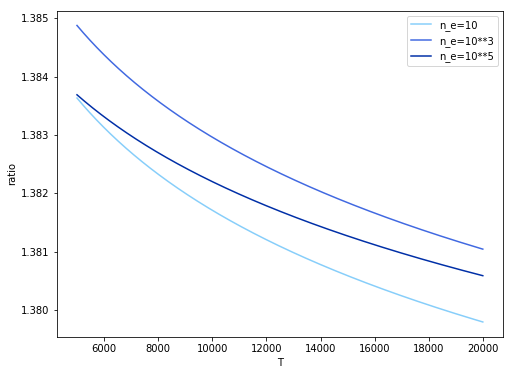

In [289]:
#2(b)

I,R=[],[]
for i in np.arange(5000,20000,10):
    M=N(i,10)
    ratio=M[3]*(2.99*10**(-3))/M[4]/1.12
    I=np.append(I,i)
    R=np.append(R,ratio)
fig=plt.figure(1,figsize=(8,6))    
plt.plot(I,R,label='n_e=10',c='#87cefa')
plt.legend()

I,R=[],[]
for i in np.arange(5000,20000,10):
    M=N(i,10**3)
    ratio=M[3]*(2.99*10**(-3))/M[4]/1.12
    I=np.append(I,i)
    R=np.append(R,ratio)   
plt.plot(I,R,label='n_e=10**3',c='#4169e1')
plt.legend()

I,R=[],[]
for i in np.arange(5000,20000,10):
    M=N(i,10**5)
    ratio=M[3]*(2.99*10**(-3))/M[4]/1.12
    I=np.append(I,i)
    R=np.append(R,ratio)
plt.plot(I,R,label='n_e=10**5',c='#002fa7')
plt.xlabel('T')
plt.ylabel('ratio')
plt.legend()

